In [467]:
import tkinter as tk 
from tkinter import *
from tkinter import filedialog
from PIL import Image
from PIL import ImageTk
import cv2
import numpy as np
import imutils
# importamos las librerias
# importamos las librerias R    econocim iento 
from imutils.object_detection import non_max_suppression
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from PIL import Image as imagePIL
import numpy as np
import lbp
import matplotlib.pyplot as plt


In [468]:
# importamos las librerias
##generar datos 
from __future__ import print_function
from imutils.object_detection import non_max_suppression
import datetime
import os


In [469]:
#multiclase lbp
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from pandas import DataFrame
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import lbp

In [470]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [471]:
faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
def deteccion_SINLBP(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceClassif.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # path del modelo entrenado
    modelo_path = modelFile
    #'E:/Identificacion de personas/ProgramaFinal/modelo_multiclase.h5'
    video_path =path_video
    # path clases
    classes_path =cclassFile
    # 'E:/Identificacion de personas/ProgramaFinal/clases_multiclases.txt'
    # cargamos las clases guardadas en el archivo classes.txt
    classes = np.loadtxt(classes_path, dtype=np.str)
    # instanciamos la fuente para el texto que se mostrara al identificar a una persona
    font = cv2.FONT_HERSHEY_SIMPLEX
    # traemos el video que analizaremos
    ########video = cv2.VideoCapture(video_path)#####cap
    # cargamos el modelo pre - entrenado
    our_model = keras.models.load_model(modelo_path)
    scale = 1.0
    # cargamos el modelo HOGDescriptor
    hog = cv2.HOGDescriptor()
    # cargamos los pesos para detectar personas en una imagen
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
    # contador de frames
    count = 0
    aux = frame.copy()
    # resultados de la deteccion de personas en el frame
    (rects, weights) = hog.detectMultiScale(frame, winStride=(2, 2), padding=(4, 4), scale=1.05)
    idx = 0
    
    # recorrido del resultado de rects  para dibujar las cajas alrededor de las personas detectas
    for (x, y, w, h) in rects:
        # presicion de la deteccion
        confidence = float((weights[idx]))
# se tomara en cuenta la deteccion de una persona en el frame siempre que la exactitud sea mayor a 2.1
        if confidence >= 2.1:
            # captura de la seccion del frame, donde se ha detectado una persona
            body = aux[y:y + h, x:x + w, :]
            # transformamos la seccion de la imagen a PIL image
            # body = body.resize((100, 100))
            # redimensionamos la seccion que contiene a la persona, para poder pasarla a nuestra red
            body = image.array_to_img(x=body).resize(size=(100, 100))
            plt.imshow(body)
            plt.show()
            #body = cv2.resize(body, (100, 100))
            # tranformamos la imagen a un arreglo
            X = image.img_to_array(body)
            # expandimos las dimensiones del array
            X = np.expand_dims(X, axis=0)
            # guardamos esto en un numpy array
            images = np.vstack([X])
            # hacemos la prediccion para la persona detectada en la imagen
            val = our_model.predict(images)
            print(val)
            _, j = np.where(val == 1)
            label = classes[j]
            # dibujamos un rectangulo alrededor del peaton detectado
            cv2.rectangle(aux, (x, y), (x + w, y + h), (0, 0, 255), 2)
            # escribimos el nombre de la etiqueta
            cv2.putText(aux, "{}".format(label), (x, y + 15),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
            idx += 1
    rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
    pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)
    # se dibujan los rectangulos finales
    for (xA, yA, xB, yB) in pick:
        cv2.rectangle(frame, (xA, yA), (xB, yB), (0, 255, 0), 2)
    aux = cv2.cvtColor(aux, cv2.COLOR_BGR2RGB)
    return frame

In [472]:
faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
def deteccion_LBP(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceClassif.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # path del modelo entrenado
    # path del modelo entrenado
    model_path = modelFile
    #'modelo_multiclase_lbp.h5'
    # path video
    video_path = path_videoLBP
    # path clases
    classes_path = cclassFile
    # cargamos las clases guardadas en el archivo classes.txt
    classes = np.loadtxt(cclassFile, dtype=np.str)

    # instanciamos la fuente para el texto que se mostrara al identificar a una persona
    font = cv2.FONT_HERSHEY_SIMPLEX

    # traemos el video que analizaremos
    video = cv2.VideoCapture(video_path)

    # cargamos el modelo pre - entrenado
    our_model = keras.models.load_model(model_path)

    scale = 1.0

    # cargamos el modelo HOGDescriptor
    hog = cv2.HOGDescriptor()

    # cargamos los pesos para detectar personas en una imagen
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

    # contador de frames
    count = 0

    # copia del frame
    aux = frame.copy()

    # resultados de la deteccion de personas en el frame
    (rects, weights) = hog.detectMultiScale(frame, winStride=(2, 2), padding=(4, 4), scale=1.05)
    idx = 0

    # recorrido del resultado de rects  para dibujar las cajas alrededor de las personas detectas

    for (x, y, w, h) in rects:
    # ciclo para mostrar los frames del video
        # prediccion de la deteccion
        confidence = float((weights[idx]))

        # se tomara en cuenta la deteccion de una persona en el frame siempre que la exactitud sea mayor a 2.1
        if confidence >= 2.1:
            # captura de la seccion del frame, donde se ha detectado una persona
            body = aux[y:y + h, x:x + w, :]

            # redimensionamos la seccion que contiene a la perona, para poder pasarla a nuestra red
            body = cv2.resize(body, (100, 100))

            # pasamos la imagen por el filtor lbp para conseguir las texturas de la imagen
            body_lbp = lbp.transform(body)
            plt.imshow(body_lbp)
            plt.show()
            # tranformamos la imagen filstrada en un objeto imagePIL para pasarla a nuestra red
            body_lbp_pil = imagePIL.fromarray(body_lbp)
            plt.imshow(body_lbp_pil)
            plt.show()
            # pasamos la imagen filtrada a un array
            X = image.img_to_array(body_lbp_pil)

            # expandimos las dimensiones del array
            X = np.expand_dims(X, axis=0)

            # guardamos esto en un numpy array
            images = np.vstack([X])

            # hacemos la prediccion para la persona detectada en la imagen
            val = our_model.predict(images)
            print(val)
            _, j = np.where(val == 1)

            # dibujamos un rectangulo alrededor del peaton detectado
            cv2.rectangle(aux, (x, y), (x + w, y + h), (0, 0, 255), 2)

            # escribimos el nombre de la etiqueta
            cv2.putText(aux, "{}".format(classes[j]), (x, y + 15),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
            idx += 1

    rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
    pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)
    # se dibujan los rectangulos finales
    for (xA, yA, xB, yB) in pick:
        cv2.rectangle(frame, (xA, yA), (xB, yB), (0, 255, 0), 2)
    return frame

In [473]:
def video_de_entrada():
    global cap, path_video,path_videoLBP
    if selected.get() == 1:
        path_video = filedialog.askopenfilename(filetypes = [
            ("all video format", ".mp4"),
            ("all video format", ".avi")])
        if len(path_video) > 0:
            btnEnd.configure(state="active")
            rad1Ele.configure(state="disabled")
            rad2Direc.configure(state="disabled")

            pathInputVideo = "..." + path_video[-20:]
            lblInfoVideoPath.configure(text=pathInputVideo)
            cap = cv2.VideoCapture(path_video)
            visualizar()
    if selected.get() == 2:
        #btnEnd.configure(state="active")
        #rad1Ele.configure(state="disabled")
        #rad2Direc.configure(state="disabled")
        #lblInfoVideoPath.configure(text="")
        #cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
        #visualizar()
        path_videoLBP = filedialog.askopenfilename(filetypes = [
            ("all video format", ".mp4"),
            ("all video format", ".avi")])
        if len(path_videoLBP) > 0:
            btnEnd.configure(state="active")
            rad1Ele.configure(state="disabled")
            rad2Direc.configure(state="disabled")

            pathInputVideo = "..." + path_videoLBP[-20:]
            lblInfoVideoPath.configure(text=pathInputVideo)
            cap = cv2.VideoCapture(path_videoLBP)
            visualizarLBP()

In [474]:
def visualizar():
    global cap
    ret, frame = cap.read()
    if ret == True:
        frame = imutils.resize(frame, width=640)
        frame = deteccion_SINLBP(frame)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        im = Image.fromarray(frame)
        img = ImageTk.PhotoImage(image=im)

        lblVideo.configure(image=img)
        lblVideo.image = img
        lblVideo.after(10, visualizar)
    else:
        lblVideo.image = ""
        lblInfoVideoPath.configure(text="")
        rad1Ele.configure(state="active")
        rad2Direc.configure(state="active")
        selected.set(0)
        btnEnd.configure(state="disabled")
        cap.release()
        

In [475]:
def visualizarLBP():
    global cap
    ret, frame = cap.read()
    if ret == True:
        frame = imutils.resize(frame, width=640)
        frame = deteccion_LBP(frame)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        im = Image.fromarray(frame)
        img = ImageTk.PhotoImage(image=im)

        lblVideo.configure(image=img)
        lblVideo.image = img
        lblVideo.after(10, visualizar)
    else:
        lblVideo.image = ""
        lblInfoVideoPath.configure(text="")
        rad1Ele.configure(state="active")
        rad2Direc.configure(state="active")
        selected.set(0)
        btnEnd.configure(state="disabled")
        cap.release()

In [476]:
def finalizar_limpiar():
    lblVideo.image = ""
    lblInfoVideoPath.configure(text="")
    rad1Ele.configure(state="active")
    rad2Direc.configure(state="active")
    selected.set(0)
    cap.release()

In [477]:
def elegir_imagen():
    # Especificar los tipos de archivos, para elegir solo a las imágenes
    path_image = filedialog.askopenfilename(filetypes = [
        ("image", ".jpeg"),
        ("image", ".png"),
        ("image", ".jpg")])

    if len(path_image) > 0:
        global image

        # Leer la imagen de entrada y la redimensionamos
        image = cv2.imread(path_image)
        image= imutils.resize(image, height=380)

        # Para visualizar la imagen de entrada en la GUI
        imageToShow= imutils.resize(image, width=180)
        imageToShow = cv2.cvtColor(imageToShow, cv2.COLOR_BGR2RGB)
        im = Image.fromarray(imageToShow )
        img = ImageTk.PhotoImage(image=im)
    
        lblInputImage.configure(image=img)
        lblInputImage.image = img
        

        # Al momento que leemos la imagen de entrada, vaciamos
        # la iamgen de salida y se limpia la selección de los
        # radiobutton
        lblOutputImage.image = ""
        selected.set(0)

In [478]:
def deteccion_color():
    global image
    if selected.get() == 1:
        # Rojo
        rangoBajo1 = np.array([0, 140, 90], np.uint8)
        rangoAlto1 = np.array([8, 255, 255], np.uint8)
        rangoBajo2 = np.array([160, 140, 90], np.uint8)
        rangoAlto2 = np.array([180, 255, 255], np.uint8)

    if selected.get() == 2:
        # Amarillo
        rangoBajo = np.array([10, 98, 0], np.uint8)
        rangoAlto = np.array([25, 255, 255], np.uint8)

    if selected.get() == 3:
        # Azul celeste
        rangoBajo = np.array([88, 104, 121], np.uint8)
        rangoAlto = np.array([99, 255, 243], np.uint8)
        
    imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    imageGray = cv2.cvtColor(imageGray, cv2.COLOR_GRAY2BGR)
    imageHSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    if selected.get() == 1:
        # Detectamos el color rojo
        maskRojo1 = cv2.inRange(imageHSV, rangoBajo1, rangoAlto1)
        maskRojo2 = cv2.inRange(imageHSV, rangoBajo2, rangoAlto2)
        mask = cv2.add(maskRojo1, maskRojo2)
    else:
        # Detección para el color Amarillo y Azul celeste
        mask = cv2.inRange(imageHSV, rangoBajo, rangoAlto)

    mask = cv2.medianBlur(mask, 7)
    colorDetected = cv2.bitwise_and(image, image, mask=mask)

    # Fondo en grises
    invMask = cv2.bitwise_not(mask)
    bgGray = cv2.bitwise_and(imageGray, imageGray, mask=invMask)

    # Sumamos bgGray y colorDetected
    finalImage = cv2.add(bgGray, colorDetected)
    imageToShowOutput = cv2.cvtColor(finalImage, cv2.COLOR_BGR2RGB)

    # Para visualizar la imagen en lblOutputImage en la GUI
    im = Image.fromarray(imageToShowOutput)
    img = ImageTk.PhotoImage(image=im)
    lblOutputImage.configure(image=img)
    lblOutputImage.image = img
    # Label IMAGEN DE SALIDA
    lblInfo3 = Label(win, text="IMAGEN DE SALIDA:", font="bold")
    lblInfo3.grid(column=1, row=0, padx=5, pady=5)



In [479]:
def ModelFile():
    global modelFile
    modelFile=filedialog.askopenfilename(initialdir = "/",
                title = "Seleccione archivo",filetypes = (("jpeg files","*.jpg"),
                ("all files","*.*")))
    print(modelFile)
def ClassFile():
    global cclassFile
    cclassFile=filedialog.askopenfilename(initialdir = "/",
                title = "Seleccione archivo",filetypes = (("jpeg files","*.jpg"),
                ("all files","*.*")))
    print(cclassFile)

In [480]:
def ventanaVideo():
    global winVideo,lblInfo1Video,btnEleVideo,rad1Ele,rad2Direc,lblInfoVideoPath,lblVideo,btnEnd,selected,lblCapturaImegen
    cap = None
    winVideo = tk.Toplevel()
    ###################################
    lblCapturaImegen = Label(winVideo)
    lblCapturaImegen.grid(column=100, row=30, columnspan=2)
    ###################################
    lblInfo1Video = Label(winVideo, text="VIDEO DE ENTRADA", font="bold")
    lblInfo1Video.grid(column=0, row=0, columnspan=2)
    selected = IntVar()
    rad1Ele = Radiobutton(winVideo, text="Reconocer Sin LBP", width=20, value=1, variable=selected, command=video_de_entrada)

    #rad2Direc = Radiobutton(winVideo, text="Video en directo", width=20, value=2, variable=selected, command=video_de_entrada)
    rad2Direc = Radiobutton(winVideo, text="Reconocer Con LBP", width=20, value=2, variable=selected, command=video_de_entrada)
    rad1Ele.grid(column=0, row=1)
    rad2Direc.grid(column=1, row=1)
    ### boton llenar  datos
    btnModeloMain =Button(winVideo, text="Modelo.h5", command = ModelFile)
    btnModeloMain.grid(column=2, row=2)
    ##boton 
    btnModeloMain =Button(winVideo, text="Clase.txt", command = ClassFile)
    btnModeloMain.grid(column=2, row=3)

    ### boton generar datos
    btnGenerar =Button(winVideo, text="Generar datos", command = ventanaGenerarD)
    btnGenerar.grid(column=2, row=4,columnspan=2, pady=10)
    ##boton 
    lblInfoVideoPath = Label(winVideo, text="", width=20)
    lblInfoVideoPath.grid(column=0, row=2)

    lblVideo = Label(winVideo)
    lblVideo.grid(column=0, row=3, columnspan=2)

    btnEnd = Button(winVideo, text="Finalizar visualización y limpiar", state="disabled", command=finalizar_limpiar)
    btnEnd.grid(column=0, row=4, columnspan=2, pady=10)




In [481]:
def ventana2():
    global lblInputImage, lblOutputImage,selected,win

    win = tk.Toplevel()
    # Label donde se presentará la imagen de entrada
    lblInputImage = tk.Label(win)
    lblInputImage.grid(column=0, row=2)
    # Label donde se presentará la imagen de salida
    lblOutputImage = Label(win)
    lblOutputImage.grid(column=1, row=1, rowspan=6)

    lblInfo2 = Label(win, text="Analizar", width=25)
    lblInfo2.grid(column=0, row=3, padx=5, pady=5)
    # Label IMAGEN DE ENTRADA
    lblInfo1 = tk.Label(win, text="IMAGEN DE ENTRADA:")
    lblInfo1.grid(column=0, row=1, padx=5, pady=5)
    # Creamos los radio buttons y la ubicación que estos ocuparán
    selected = IntVar()
    rad1 = Radiobutton(win, text='Rojo', width=25,value=1, variable=selected, command= deteccion_color)
    rad2 = Radiobutton(win, text='Amarillo',width=25, value=2, variable=selected, command= deteccion_color)
    rad3 = Radiobutton(win, text='Azul celeste',width=25, value=3, variable=selected, command= deteccion_color)
    rad1.grid(column=0, row=4)
    rad2.grid(column=0, row=5)
    rad3.grid(column=0, row=6)
    # Creamos el botón para elegir la imagen de entrada
    btn = Button(win, text="Elegir imagen", width=25, command=elegir_imagen)
    btn.grid(column=0, row=0, padx=5, pady=5)


In [482]:
def carpeta():
    global directorio
    directorio = filedialog.askdirectory()
    if directorio!= "":
        os.chdir(directorio)
    print(directorio)
def videoPruebaPath():
    global VideoPP
    VideoPP =  filedialog.askopenfilename(filetypes = [
            ("all video format", ".mp4"),
            ("all video format", ".avi")])
    print(VideoPP)



In [483]:
#######################################CON LBP
def generarCONLBP():
    # directorio para guardar los datos
    path_to_save_data = directorio
    # nombre de las imagenes
    data_names = 'imgp'
    # path del video
    video_path = VideoPP
    # si el directorio no existe se creara
    if not os.path.exists(path_to_save_data):
        print('Carpeta creada: ', path_to_save_data)
        os.makedirs(path_to_save_data)

    # instanciamos la fuente para el texto
    font = cv2.FONT_HERSHEY_SIMPLEX

    # traemos el video que analizaremos
    video = cv2.VideoCapture(video_path)

    scale = 1.0

    hog = cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
    # contador de frames
    count = 0
    while video.isOpened():
        ret, frame = video.read()
        if ret == False: break
        w = int(frame.shape[1] / scale)
        aux = frame.copy()
        (rects, weights) = hog.detectMultiScale(frame, winStride=(2, 2), padding=(4, 4), scale=1.05)
        idx = 0
        for (x, y, w, h) in rects:
            confidence = float((weights[idx]))
            if confidence >= 2.4:
                body = aux[y:y+h, x:x+w]
                # body = cv2.resize(body, (150, 150), interpolation=cv2.INTER_CUBIC)
                body_lbp = lbp.transform(body)
                # sin  lbp
                cv2.imwrite(path_to_save_data+'/'+data_names+'{}.jpg'.format(count), body_lbp)
                #cv2.imshow("Body", body_lbp)
                cv2.putText(aux, "{:.5f}".format(confidence), (x, y + 15),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

                cv2.rectangle(aux, (x, y), (x + w, y + h), (0, 0, 255), 2)
                count += 1
                idx+=1
        rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
        pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)
        # draw the final bounding boxes
        for (xA, yA, xB, yB) in pick:
            cv2.rectangle(frame, (xA, yA), (xB, yB), (0, 255, 0), 2)

        # show the output image with the face detections + facial landmarks
        cv2.imshow("OutputNMS", aux)
        cv2.imshow("Output", aux)

        k = cv2.waitKey(1)

        if k == 27 or count >= 360:
            break
    video.release()
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [484]:
#######################################SIN LBP
def generarSINLBP():
    # directorio para guardar los datos
    path_to_save_data = directorio
    # nombre de las imagenes
    data_names = 'imgp'
    # path del video
    video_path = VideoPP
    # si el directorio no existe se creara
    if not os.path.exists(path_to_save_data):
        print('Carpeta creada: ', path_to_save_data)
        os.makedirs(path_to_save_data)

    # instanciamos la fuente para el texto
    font = cv2.FONT_HERSHEY_SIMPLEX

    # traemos el video que analizaremos
    video = cv2.VideoCapture(video_path)

    scale = 1.0

    hog = cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
    # contador de frames
    count = 0
    while video.isOpened():
        ret, frame = video.read()
        if ret == False: break
        w = int(frame.shape[1] / scale)

        aux = frame.copy()
        (rects, weights) = hog.detectMultiScale(frame, winStride=(2, 2), padding=(4, 4), scale=1.05)
        idx = 0
        for (x, y, w, h) in rects:
            confidence = float((weights[idx]))
            if confidence >= 2.4:
                body = aux[y:y+h, x:x+w]
                # body = cv2.resize(body, (150, 150), interpolation=cv2.INTER_CUBIC)
                body_lbp = lbp.transform(body)
                # sin  lbp
                cv2.imwrite(path_to_save_data+'/'+data_names+'{}.jpg'.format(count), body)
                #cv2.imshow("Body", body_lbp)

                cv2.putText(aux, "{:.5f}".format(confidence), (x, y + 15),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

                cv2.rectangle(aux, (x, y), (x + w, y + h), (0, 0, 255), 2)
                count += 1
                idx+=1
        rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
        pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)
        # draw the final bounding boxes
        for (xA, yA, xB, yB) in pick:
            cv2.rectangle(frame, (xA, yA), (xB, yB), (0, 255, 0), 2)

        # show the output image with the face detections + facial landmarks
        cv2.imshow("OutputNMS", aux)
        cv2.imshow("Output", aux)

        k = cv2.waitKey(1)

        if k == 27 or count >= 360:
            break
    video.release()
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [485]:
def carpetaEnt():
    global directorioEnt
    directorioEnt = filedialog.askdirectory()
    if directorioEnt!= "":
        os.chdir(directorioEnt)
    pathDirEnt = "..." + directorioEnt[-20:]
    lblInfoEnt.configure(text=pathDirEnt)
    print(directorioEnt)

def carpetaVal():
    global directorioVal
    directorioVal = filedialog.askdirectory()
    if directorioVal!= "":
        os.chdir(directorioVal)
    pathDirVal = "..." + directorioVal[-20:]
    lblInfoVal.configure(text=pathDirVal)
    print(directorioVal)
def carpetaEntLBP():
    global directorioEntLBP
    directorioEntLBP = filedialog.askdirectory()
    if directorioEntLBP!= "":
        os.chdir(directorioEntLBP)
    pathDirEnt = "..." + directorioEntLBP[-20:]
    lblInfoEntLBP.configure(text=pathDirEnt)
    print(directorioEntLBP)

def carpetaValLBP():
    global directorioValLBP
    directorioValLBP = filedialog.askdirectory()
    if directorioValLBP!= "":
        os.chdir(directorioValLBP)
    pathDirVal = "..." + directorioValLBP[-20:]
    lblInfoValLBP.configure(text=pathDirVal)
    print(directorioValLBP)



In [486]:
def entrenamientoMulticlaseLBP():
    # tamaño para redimensionar las entradas
    resize_shape = (200, 200)
    input_data_shape = (200, 200, 3) # este sera el tamaño con el que los datos entrarán en la red neuronal
    # directorios de los datos de entrenamiento y validacion
    path_train_data = directorioEntLBP
    path_validation_data = directorioValLBP
    # nombre del archivo exportado del modelo
    model_path_name = txtModeloLBP.get()
    # nombre del archivo exportado para guardar las clases encontradas
    class_file_path_name = txtClaseLBP.get()
    print(txtModeloLBP.get())
    print(txtClaseLBP.get())
    # instancia de ImageDataGenerators para el entrenamiento y validacion
    train = ImageDataGenerator(rescale = 1/255)
    validation = ImageDataGenerator(rescale = 1/255)
    # dataset de entrenamiento y validacion redimensionados (100, 100)
    train_dataset = train.flow_from_directory(path_train_data,
                                            target_size = (100, 100),
                                            )
    validation_dataset = train.flow_from_directory(path_validation_data,
                                            target_size = (100, 100),
                                            )
    # creamos las capas de la red neuronal
    model = Sequential([
        Conv2D(100, (3, 3), activation='relu', input_shape = (100, 100, 3)),
        MaxPooling2D(2, 2),
        Dropout(0.25),
        Flatten(),
        Dense(200, activation='relu'),
        Dropout(0.5),
        Dense(3, activation='softmax')
    ])
    # compilamos la red
    model.compile(loss = 'categorical_crossentropy', optimizer=Adam(lr=0.001,decay=1e-6), metrics=['accuracy'])
    # entrenamos la red
    model_fit = model.fit(train_dataset,
                        steps_per_epoch=3,
                        epochs=10,
                        validation_data=validation_dataset)
    # guardamos el modelo en un arhivo .h5
    model.save(model_path_name)
    # guardamos las clases en un archivo .txt
    elements = []
    # guardanmos las clases en un array
    for value in train_dataset.class_indices:
        elements.append(value)
    # guardamos el array en un archivo de texto
    np.savetxt(class_file_path_name, np.array(elements), fmt="%s")


In [487]:
def entrenamientoMulticlase():
    # tamaño para redimensionar las entradas
    resize_shape = (200, 200)
    input_data_shape = (200, 200, 3) # este sera el tamaño con el que los datos entrarán en la red neuronal
    # directorios de los datos de entrenamiento y validacion
    path_train_data = directorioEnt
    path_validation_data = directorioVal
    # nombre del archivo exportado del modelo
   

    model_path_name = txtModelo.get()
    # nombre del archivo exportado para guardar las clases encontradas
    class_file_path_name = txtClase.get()
    # instancia de ImageDataGenerators para el entrenamiento y validacion
    train = ImageDataGenerator(rescale = 1/255)
    validation = ImageDataGenerator(rescale = 1/255)

    # dataset de entrenamiento y validacion redimensionados (100, 100)
    train_dataset = train.flow_from_directory(path_train_data,
                                            target_size = (100, 100),
                                            )
    validation_dataset = train.flow_from_directory(path_validation_data,
                                            target_size = (100, 100),
                                            )
    # creamos las capas de la red neuronal
    model = Sequential([
        Conv2D(100, (3, 3), activation='relu', input_shape = (100, 100, 3)),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        Flatten(),

        Dense(200, activation='relu'),
        Dropout(0.5),
        Dense(3, activation='softmax')
    ])
    # compilamos la red
    model.compile(loss = 'categorical_crossentropy', optimizer=Adam(lr=0.001,decay=1e-6), metrics=['accuracy'])
    # entrenamos la red
    model_fit = model.fit(train_dataset,
                        steps_per_epoch=3,
                        epochs=10,
                        validation_data=validation_dataset)
    # guardamos el modelo en un arhivo .h5
    model.save(model_path_name)
    # guardamos las clases en un archivo .txt
    elements = []
    # guardanmos las clases en un array
    for value in train_dataset.class_indices:
        elements.append(value)
    # guardamos el array en un archivo de texto
    np.savetxt(class_file_path_name, np.array(elements), fmt="%s")


In [488]:
def ventanaEntrenarLBP():
    global winEntrenarCon,lblInfoEntLBP,lblInfoValLBP,txtClaseLBP,txtModeloLBP
    cap = None
    winEntrenarCon = tk.Toplevel()
    lblGLBP = Label(winEntrenarCon, text="Entrenar Red con LBP ", font="bold")
    lblGLBP.grid(column=0, row=0, columnspan=2)
    lblModeloLBP = Label(winEntrenarCon, text="Nombre del modelo")
    lblModeloLBP.grid(column=0, row=2)
    txtModeloLBP= tk.Entry(winEntrenarCon)
    txtModeloLBP.grid(column=1, row=2)
    lblejeMLBP = Label(winEntrenarCon, text="ModeloLBP.h5")
    lblejeMLBP.grid(column=3, row=2)
    print(txtModeloLBP.get())
    lblClaseLBP = Label(winEntrenarCon, text="Nombre de clases")
    lblClaseLBP.grid(column=0, row=3)
    txtClaseLBP= tk.Entry(winEntrenarCon)
    txtClaseLBP.grid(column=1, row=3)
    lblejeLBP = Label(winEntrenarCon, text="ClaseLBP.txt")
    lblejeLBP.grid(column=3, row=3)
    print(txtClaseLBP.get())
    ### boton generar datos
    btnEntLBP=Button(winEntrenarCon, text="Datos de entrenamiento", command=carpetaEntLBP)
    btnEntLBP.grid(column=0, row=4)
    lblInfoEntLBP = Label(winEntrenarCon, text="LBP ", width=20)
    lblInfoEntLBP.grid(column=3, row=4)
    ### boton generar datos
    btnValLBP=Button(winEntrenarCon, text="Datos de Validacion", command=carpetaValLBP)
    btnValLBP.grid(column=0, row=5)
    lblInfoValLBP = Label(winEntrenarCon, text="LBP", width=20)
    lblInfoValLBP.grid(column=3, row=5)
    ### boton generar datos
    btnEntrenarLBP=Button(winEntrenarCon, text="Entrenar red con LBP", command=entrenamientoMulticlaseLBP)
    btnEntrenarLBP.grid(column=3, row=10)

In [489]:
def ventanaEntrenarD():
    global winEntrenarSin,lblInfoEnt,lblInfoVal,txtClase,txtModelo
    cap = None
    winEntrenarSin = tk.Toplevel()
    lblG = Label(winEntrenarSin, text="Entrenar Red", font="bold")
    lblG.grid(column=0, row=0, columnspan=2)
    lblModelo = Label(winEntrenarSin, text="Nombre del modelo")
    lblModelo.grid(column=0, row=2)
    txtModelo= tk.Entry(winEntrenarSin)
    txtModelo.grid(column=1, row=2)
    lblejeM = Label(winEntrenarSin, text="modelo.h5")
    lblejeM.grid(column=3, row=2)
    print(txtModelo.get())
    lblClase = Label(winEntrenarSin, text="Nombre de clases")
    lblClase.grid(column=0, row=3)
    txtClase= tk.Entry(winEntrenarSin)
    txtClase.grid(column=1, row=3)
    lbleje = Label(winEntrenarSin, text="multi.txt")
    lbleje.grid(column=3, row=3)
    print(txtClase.get())
    ### boton generar datos
    btnEnt=Button(winEntrenarSin, text="Datos de entrenamiento", command=carpetaEnt)
    btnEnt.grid(column=0, row=4)
    lblInfoEnt = Label(winEntrenarSin, text="la ", width=20)
    lblInfoEnt.grid(column=3, row=4)
    ### boton generar datos
    btnVal=Button(winEntrenarSin, text="Datos de Validacion", command=carpetaVal)
    btnVal.grid(column=0, row=5)
    lblInfoVal = Label(winEntrenarSin, text="laaa", width=20)
    lblInfoVal.grid(column=3, row=5)
    ### boton generar datos
    btnEntrenar=Button(winEntrenarSin, text="Entrenar red", command=entrenamientoMulticlase)
    btnEntrenar.grid(column=3, row=10)
    

In [490]:
def ventanaGenerarD():
    global winGenerar
    cap = None
    winGenerar = tk.Toplevel()
    lblG = Label(winGenerar, text="Generador de datos", font="bold")
    lblG.grid(column=0, row=0, columnspan=2)
     ### boton generar datos
    btnDateG=Button(winGenerar, text="Directorio para guardar Datos", command = carpeta)
    btnDateG.grid(column=0, row=1)
     ### boton generar datos
    btnGenerarV =Button(winGenerar, text="Video de prueba ", command = videoPruebaPath)
    btnGenerarV.grid(column=0, row=2)
    ### boton generar datosNOOOOOOOOOOOOOOOO
    btnGenerarLBP =Button(winGenerar, text="Generar con LBP ", command = generarCONLBP)
    btnGenerarLBP.grid(column=0, row=4)
    ### boton generar datosNOOOOOOOOOOO
    btnGenerarLBP =Button(winGenerar, text="Entrenar con LBP ", command = ventanaEntrenarLBP)
    btnGenerarLBP.grid(column=2, row=4)
    ##
    btnGenerarSLBP =Button(winGenerar, text="Generar sin LBP ", command = generarSINLBP)
    btnGenerarSLBP.grid(column=0, row=5)
    ### boton generar datos
    btnGenerarLBP =Button(winGenerar, text="Entrenar Sin LBP ", command = ventanaEntrenarD)
    btnGenerarLBP.grid(column=2, row=5)



E:/Identificacion de personas/ProgramaFinal/data/train
E:/Identificacion de personas/ProgramaFinal/data/validation
lalal.h5
clas.txt
Found 455 images belonging to 2 classes.
Found 248 images belonging to 2 classes.
Epoch 1/10
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\User\miniconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "<ipython-input-486-5220f085f077>", line 37, in entrenamientoMulticlaseLBP
    model_fit = model.fit(train_dataset,
  File "C:\Users\User\miniconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:\Users\User\miniconda3\lib\site-packages\tensorflow\python\eager\def_function.py", line 828, in __call__
    result = self._call(*args, **kwds)
  File "C:\Users\User\miniconda3\lib\site-packages\tensorflow\python\eager\def_function.py", line 888, in _call
    return self._stateless_fn(*args, **kwds)
  Fi

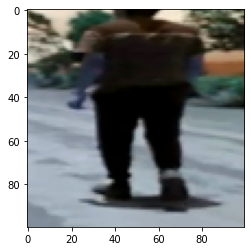

In [491]:


ventana= tk.Tk()

ventana.title("Sistema")

ventana.geometry('500x500')

lbl = Label(ventana, text="Sistema para el reconocimiento de personas")
lbl.place(x=70, y=10)

lblA = Label(ventana, text="Analizar")
lblA.place(x=10, y=70)

btnV =Button(ventana, text="Video", command = ventanaVideo)
btnV.place(x=90, y=50, width=100, height=30)

btn = Button(ventana, text="Imagen", command = ventana2)
btn.place(x=90, y=90, width=100, height=30)

ventana.mainloop()